###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή:-

Α.Μ.: -

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score
import imblearn

1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [ ]:
train_data = pd.read_csv('./train-val.csv')

1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [ ]:
test_data = pd.read_csv('./test.csv')

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

____
Το σύνολο εκπαίδευσης έχει 48423 δείγματα με 23 χαρακτηριστικά και 1 στήλη-ετικέτα. Ο τύπος των στηλών είναι ως επι το πλείστον float αριθμοί, εκτός από τις στήλες Location, WindGustDir, WindDir9am, WindDir3pm, RainToday που είναι κατηγορικές και Date που είναι datetime.

____

In [ ]:
# 2a, 2b, 2c
print(train_data.shape)
print(train_data.info())


(48423, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48263 non-null  float64
 4   MaxTemp        48322 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    28039 non-null  float64
 7   Sunshine       25426 non-null  float64
 8   WindGustDir    45302 non-null  object 
 9   WindGustSpeed  45330 non-null  float64
 10  WindDir9am     44602 non-null  object 
 11  WindDir3pm     47095 non-null  object 
 12  WindSpeed9am   48066 non-null  float64
 13  WindSpeed3pm   47566 non-null  float64
 14  Humidity9am    47865 non-null  float64
 15  Humidity3pm    47164 non-null  float64
 16  Pressure9am    43643 non-null  float64
 17  Pressure3pm    43634 non-null  float64

______
Οι πιθανές τιμές του RainTomorrow είναι 0 με 37364 δείγματα και 1 με 11059. Παρατηρούμε ότι το dataset είναι ανισορροπο με τη κλάση 0 να είναι ~3.5 φορές πιο συχνή από τη κλάση 1
______

In [ ]:
# 2d
unique_classes = train_data['RainTomorrow'].unique()
print(f'Classes: {len(unique_classes)} ({unique_classes})')
# 2e
print(train_data.groupby(by='RainTomorrow').size().reset_index(name='counts'))


Classes: 2 ([0. 1.])
   RainTomorrow  counts
0           0.0   37364
1           1.0   11059


_____
Από το πίνακα συσχετίσεων παραητηρείται υψηλή συσχέτιση μεταξύ των στηλών MinTemp, MaxTemp, Temp9am, Temp3pm καθώς και μεταξύ των στηλών Pressure9am, Pressure3pm. Οι στήλες αυτές είναι υποψήφιες για να μην ληφθούν υπόψη στη διαδικασία εκπαίδευσης.
_____

<ipython-input-6-b2a50393525d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr()


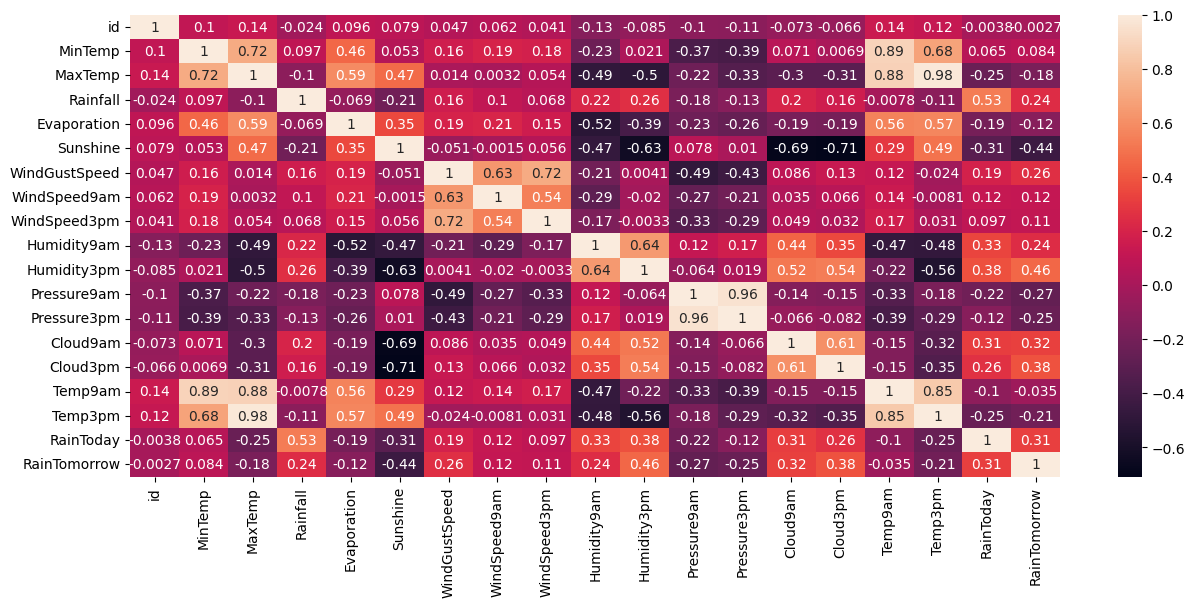

In [ ]:
# 2st
correlation = train_data.corr()
plt.figure(figsize=(15,6))
sns.heatmap(correlation, annot=True)
plt.show()

____
Τυπωνουμε το πλήθος των διφορετικών κατηγοριών στις κατηγορικές μεταβλητές. Οι στήλες που έχουν να κάνουν με ανέμους έχουν 16 διαφορετικές τιμές (+1 null), η στήλη Location έχει 49 διακριτές τιμές.

Επίσης, βρίσκουμε το ποσοστό των missing values για κάθε στήλη. Οι στήλες με τα περισσοτερα missing values είναι Evaporation με $42.0957\%$, Sunshine με $47.4919\%$, Cloud9am $36.9453\%$ και Cloud3pm με $39.1983\%$ των τιμών τους να λείπουν.
____

In [ ]:
# 2z
# non floats
for col in train_data.columns:
    if train_data[col].dtype == object:
        unique_column_values = train_data[col].unique()
        print(col)
        print(f'Column name: {col}, Unique values: {len(unique_column_values)}')

# Location, WindGustDir, WindDir9am, WindDir3pm are categorical
# We will one hot it, (How to treat nones)

# nans percentage for columns
print(train_data.isna().mean(axis=0))

# classes balance
#print(train_data.groupby(by='RainTomorrow').size() / train_data.shape[0])

# describe
train_data.describe(include ='all').T


Date
Column name: Date, Unique values: 2534
Location
Column name: Location, Unique values: 49
WindGustDir
Column name: WindGustDir, Unique values: 17
WindDir9am
Column name: WindDir9am, Unique values: 17
WindDir3pm
Column name: WindDir3pm, Unique values: 17
id               0.000000
Date             0.000000
Location         0.000000
MinTemp          0.003304
MaxTemp          0.002086
Rainfall         0.000000
Evaporation      0.420957
Sunshine         0.474919
WindGustDir      0.064453
WindGustSpeed    0.063875
WindDir9am       0.078909
WindDir3pm       0.027425
WindSpeed9am     0.007373
WindSpeed3pm     0.017698
Humidity9am      0.011523
Humidity3pm      0.026000
Pressure9am      0.098713
Pressure3pm      0.098899
Cloud9am         0.369453
Cloud3pm         0.391983
Temp9am          0.004667
Temp3pm          0.018855
RainToday        0.000000
RainTomorrow     0.000000
dtype: float64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,48423.0,NaN,NaN,NaN,24212.0,13978.660379,1.0,12106.5,24212.0,36317.5,48423.0
Date,48423,2534,2013-05-21,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,48423,49,Sydney,1145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,48263.0,NaN,NaN,NaN,10.66153,6.058113,-8.2,6.5,10.3,14.7,29.6
MaxTemp,48322.0,NaN,NaN,NaN,21.468416,6.557396,-3.2,16.7,20.7,25.8,45.4
Rainfall,48423.0,NaN,NaN,NaN,2.218592,7.377476,0.0,0.0,0.0,0.8,371.0
Evaporation,28039.0,NaN,NaN,NaN,4.590831,3.473241,0.0,2.2,4.0,6.2,68.8
Sunshine,25426.0,NaN,NaN,NaN,7.162259,3.607741,0.0,4.4,8.0,10.2,14.2
WindGustDir,45302,16,W,3586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,45330.0,NaN,NaN,NaN,39.097948,14.004819,7.0,30.0,37.0,46.0,126.0


______
Πλοτάρουμε τις κατανομές των τιμών των float στηλών και των στηλών RainToday, RainTomorrow.

Τα RainToday, RainTomorrow παρουσιάζουν παρόμοια κατανομή με τη κλάση 0 να είναι πολύ συχνή από τη κλάση 1.

Οι στήλες θερμοκρασίας παρουσιάζουν παρόμοια κατανομή μεταξύ τους. Το ίδιο και οι στήλες Pressure.
______

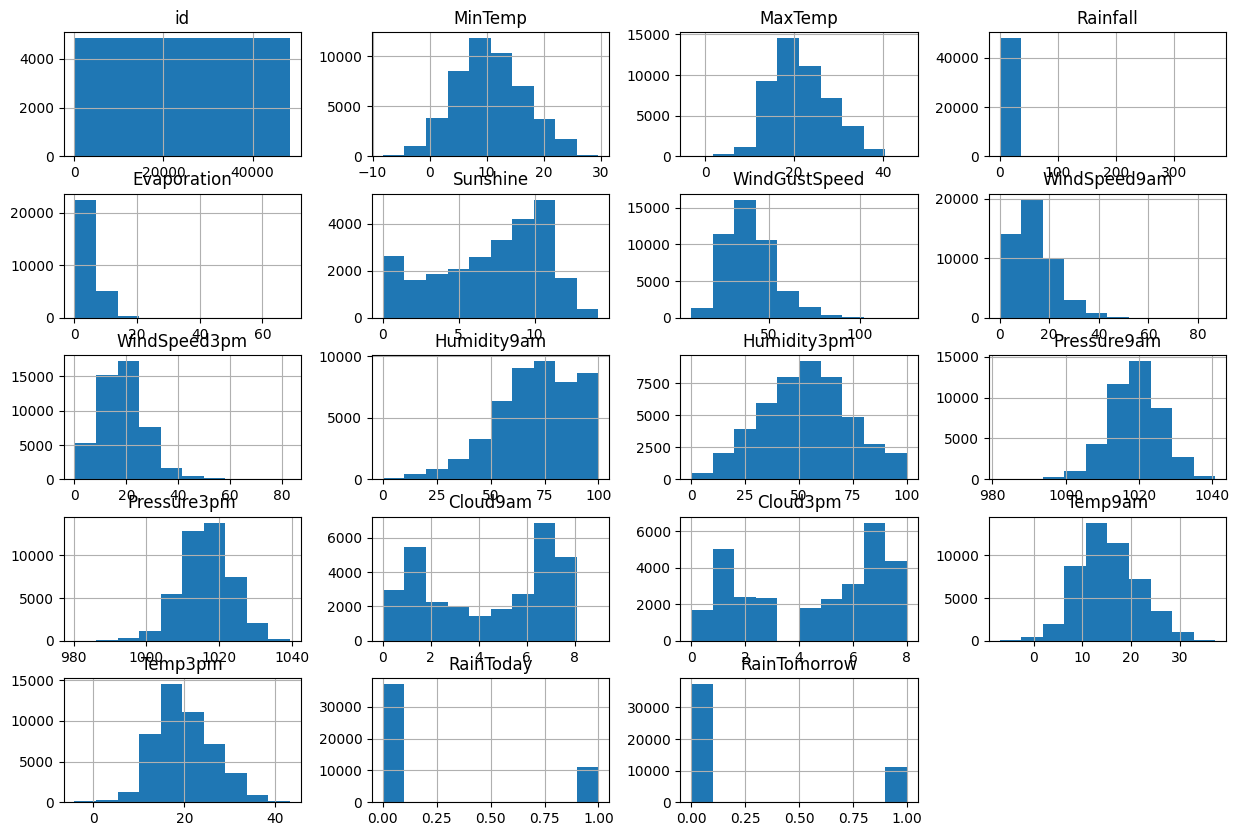

In [ ]:
train_data.hist(figsize=(15, 10))
plt.show()

_____
Ομαδοποιούμε τις παρατηρήσεις κατά Location και βρίσκουμε το ποσοστό των missing values ανα στήλη σε κάθε Location. Παρατηρούμε ότι κάποια Locations δεν καταγράφουν συγκεκριμένες στήλες. Πχ στην Adelaide δεν καταγράφονται τιμές για Cloud3pm και Cloud9am.
_____

In [ ]:
train_data[train_data.columns.difference(['Location'])].isnull().groupby(train_data['Location']).mean()

,Cloud3pm,Cloud9am,Date,Evaporation,Humidity3pm,Humidity9am,MaxTemp,MinTemp,Pressure3pm,Pressure9am,...,Sunshine,Temp3pm,Temp9am,WindDir3pm,WindDir9am,WindGustDir,WindGustSpeed,WindSpeed3pm,WindSpeed9am,id
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,1.000000,1.000000,0.0,0.438910,0.001880,0.001880,0.000000,0.000940,0.002820,0.003759,...,0.468985,0.001880,0.001880,0.003759,0.105263,0.007519,0.007519,0.002820,0.000940,0.0
Albany,0.218218,0.002002,0.0,0.084084,0.220220,0.003003,0.009009,0.012012,0.004004,0.004004,...,0.164164,0.219219,0.002002,0.240240,0.080080,1.000000,1.000000,0.222222,0.005005,0.0
Albury,0.504569,0.518782,0.0,1.000000,0.003046,0.002030,0.000000,0.001015,0.003046,0.000000,...,1.000000,0.003046,0.002030,0.021320,0.224365,0.004061,0.004061,0.003046,0.001015,0.0
AliceSprings,0.132470,0.118526,0.0,0.079681,0.000996,0.001992,0.000000,0.000996,0.000996,0.000996,...,0.174303,0.000000,0.000000,0.001992,0.094622,0.015936,0.015936,0.000000,0.000996,0.0
BadgerysCreek,1.000000,1.000000,0.0,1.000000,0.009174,0.006116,0.000000,0.001019,0.074414,0.070336,...,1.000000,0.005097,0.000000,0.022426,0.147808,0.006116,0.006116,0.006116,0.000000,0.0
Ballarat,0.262327,0.156805,0.0,1.000000,0.001972,0.007890,0.000986,0.000000,0.005917,0.007890,...,1.000000,0.001972,0.005917,0.006903,0.038462,0.009862,0.009862,0.000000,0.002959,0.0
Bendigo,0.223608,0.289827,0.0,0.611324,0.000000,0.000000,0.000000,0.000000,0.000000,0.001919,...,1.000000,0.000000,0.000000,0.016315,0.101727,0.010557,0.009597,0.000960,0.000960,0.0
Brisbane,0.000000,0.000911,0.0,0.005464,0.001821,0.000000,0.000911,0.000000,0.000000,0.000000,...,0.010018,0.001821,0.000000,0.009107,0.020947,0.000000,0.000000,0.000000,0.000000,0.0
Cairns,0.070736,0.060078,0.0,0.098837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.152132,0.000000,0.000000,0.000969,0.007752,0.007752,0.006783,0.000969,0.000000,0.0


### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


_____
Για τις στήλες θερμοκρασίας επιλέγουμε να κρατήσουμε 2 από τις 4 ως εξής:
- $maxTempFinal ← max\{MinTemp, Temp9am, Temp3pm, MaxTemp\}$
- $minTempFinal ← min\{MinTemp, Temp9am, Temp3pm, MaxTemp\}$

Αυτό έχει ως αποτέλεσμα, να θεωρούμε μέγιστη θερμοκρασία τη μέγιστη θερμοκρασία που εμφανίζεται στις 4 στήλες, ακόμα και αν υπάρχουν missing values.
_____

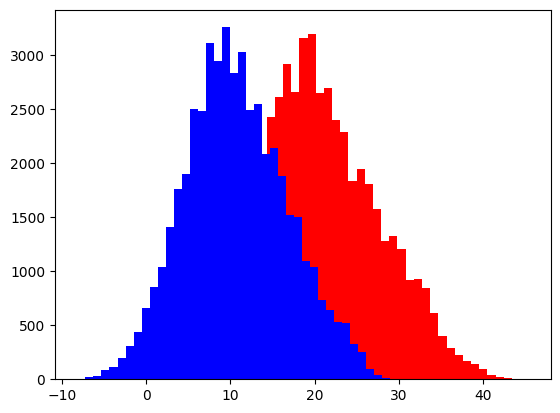

In [ ]:
maxTempTest = train_data[['MinTemp', 'Temp9am', 'Temp3pm', 'MaxTemp']].max(axis='columns')
plt.hist(maxTempTest, color='r', bins=50)

maxTempTest = train_data[['MinTemp', 'Temp9am', 'Temp3pm', 'MaxTemp']].min(axis='columns')
plt.hist(maxTempTest, color='b', bins=50)

plt.show()

_____
Για τις στήλες πίεσης κρατάμε μόνο τη Pressure3pm και χρησιμοποιούμε τη Pressure9am για να συμπληρώσουμε missing values όταν η Pressure3pm είναι κενή. Ονομάζουμε τη διαδικασία αυτή coalesce, όπως τη SQL:
- $pressureFinal ← coalesce\{Pressure3pm, Pressure9am\}$

_____

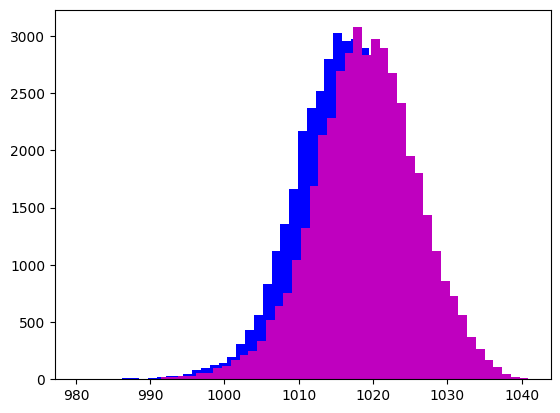

In [ ]:
plt.hist(train_data['Pressure3pm'], color='b', bins=50)
plt.hist(train_data['Pressure9am'], color='m', bins=50)
plt.show()

_____
Γράφουμε custom transformers για την εκτέλεση των παραπάνω λειτουργιών (min, max, coalesce, drop) σε επίπεδο pandas dataframes.
_____

In [ ]:
class DropFeature(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X_dropped = X.drop(self.variables, axis = 1)
        self.columns = X_dropped.columns
        return X_dropped


class CoalesceFeature(BaseEstimator, TransformerMixin):
    def __init__(self, target, source):
        self.target = target
        self.source = source

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X_ = X.copy(deep=True)
        X_[self.target] = X_[self.source].bfill(axis='columns').iloc[:, 0]
        return X_


class AggregateFeature(BaseEstimator, TransformerMixin):
    def __init__(self, target, source, aggregation):
        self.target = target
        self.source = source
        self.aggregation = aggregation

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X_ = X.copy(deep=True)
        if self.aggregation == 'mean':
            X_[self.target] = X_[self.source].mean(axis='columns')
        elif self.aggregation == 'max':
            X_[self.target] = X_[self.source].max(axis='columns')
        else:
            X_[self.target] = X_[self.source].min(axis='columns')
        return X_

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

_____
Για να συμπληρώσουμε απουσιάζουσες τιμές θα χρησιμοποιήσουμε τον kNN imputer του sklearn. Ο kNN imputer, συμπληρώνει missing values για μια γραμμή με βάση τα values που έχουν οι κοντινότεροι γείτονες της γραμμής. Ο υπολογισμός των κοντινότερων γειτόνων γίνεται με βάση τις κοινές non missing στήλες.
____

In [ ]:
kNNImputer = KNNImputer(n_neighbors=1, weights="uniform")

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

___
Για την ημερομηνία, δημιουργούμε one-hot encoding με βάση τις εποχές, μαπάροντας το μήνα στις 4 εποχές. Προκύπτουν έτσι 4 στήλες.
___

In [ ]:
class DateToSeasonTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y = None):
        return self


    def transform(self, X):
        X_ = X.copy(deep=True)
        season_df = pd.to_datetime(X_['Date'], format="%Y-%m-%d").dt.month
        X_['spring'] = season_df.isin([3, 4, 5]).astype(int)
        X_['summer'] = season_df.isin([6, 7, 8]).astype(int)
        X_['autumn'] = season_df.isin([9, 10, 11]).astype(int)
        X_['winter'] = season_df.isin([12, 1, 2]).astype(int)
        return X_


____
Γράφουμε custom transformer για το one hot encoding του Location.
____

In [ ]:
class LocationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ohe = OneHotEncoder(handle_unknown = 'ignore')

    def fit(self, X, y = None):
        X_ = X.copy()
        X_['Location'] = X_['Location'].str.upper()
        self.ohe.fit(X_.loc[:, ['Location']])
        return self

    def transform(self, X):
        X_ = X.copy(deep=True)
        X_['Location'] = X_['Location'].str.upper()
        one_hot_location = pd.DataFrame(
            self.ohe.transform(X_.loc[:, ['Location']]).toarray(),
            columns=self.ohe.get_feature_names_out()
        )
        X_[self.ohe.get_feature_names_out()] = one_hot_location[self.ohe.get_feature_names_out()].values
        return X_


_____
Για τις στήλες με το προσανατολισμό ανέμων, γράφουμε custom transformer που ακολουθεί μια λογική multiple hot, δηλαδή για παράδειγμα η τιμή NNW αντιστοιχίζεται σε ένα διάνυσμα με άσσους στο N και το W. Έτσι οι 3 αρχικές στήλες 'WindGustDir', 'WindDir9am', 'WindDir3pm' μετατρέπονται σε 12 στήλες. Σε περίπτωση που έχουμε missing value στην αρχική στήλη, βάζουμε missing values και στις 4 στήλες.
_____

In [ ]:
class DirectionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X_ = X.copy(deep=True)
        for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
            the_set = X[col].apply(lambda x: set(x) if isinstance(x, str) else x)
            for dir in ['N', 'S', 'W', 'E']:
                X_[f'{col}_{dir}'] = the_set.apply(lambda x: int(dir in x) if isinstance(x, set) else 0)
            # original df had NA in column
            all_zeros = (X_[f'{col}_N'] == 0) & (X_[f'{col}_S'] == 0) & (X_[f'{col}_W'] == 0) & (X_[f'{col}_E'] == 0 )

            # keep those NAs and impute them later
            X_.loc[all_zeros, [f'{col}_N', f'{col}_S', f'{col}_W', f'{col}_E']] = np.nan

        return X_


3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

____
Θα χρησιμοποιήσουμε κανονικοποίηση των float στηλών.
____

In [ ]:
std_scaler = StandardScaler()

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

____
Διαχωρίζουμε από τώρα τη στήλη με τις ετικέτες RainTomorrow, καθώς δεν θέλουμε να ληφθεί υπόψη από τον kNN imputer.
____

In [ ]:
train_raw_features = train_data[train_data.columns.difference(['RainTomorrow'])]
print(train_raw_features.shape)
train_labels = train_data['RainTomorrow']
print(train_labels.shape)

(48423, 23)
(48423,)


_____
Το πρώτο στάδιο του preprocessing φαίνεται παρακάτω. Έχει ως είσοδο το αρχικό dataframe και ως έξοδο το μετασχηματισμένο dataframe. Είναι σημαντικό το γεγονός ότι η έξοδος είναι dataframe και όχι numpy, καθώς θέλουμε να ξέρουμε το όνομα των στηλών ώστε να εφαρμόσουμε scaling μόνο στις float στήλες.
_____

In [ ]:
dataframe_transformers = Pipeline([
    ('MaxTempFinal', AggregateFeature('MaxTempFinal', ['MinTemp', 'Temp9am', 'Temp3pm', 'MaxTemp'], 'max')),
    ('MinTempFinal', AggregateFeature('MinTempFinal', ['MinTemp', 'Temp9am', 'Temp3pm', 'MaxTemp'], 'min')),
    ('Pressure', CoalesceFeature('Pressure', ['Pressure3pm', 'Pressure9am'])),
    ('Location', LocationTransformer()),
    ('Direction', DirectionTransformer()),
    ('Season', DateToSeasonTransformer()),
    ("drop", DropFeature([
        'id',
        'MinTemp',
        'MaxTemp',
        'Temp9am',
        'Temp3pm',
        'Pressure3pm',
        'Pressure9am',
        'Location',
        'Date',
        'WindGustDir',
        'WindDir9am',
        'WindDir3pm',
    ]))
])
transformed_df = dataframe_transformers.fit_transform(train_raw_features)


_____
Η έξοδος του πρώτου σταδίου preprocessing φαίνεται παρακάτω. Έχουμε καταλήξει σε 79 χαρακτηριστικά. Μένει να κάνουμε scaling στις float στήλες και να κάνουμε imputing με βάση τόσο τις αριθμητικές όσο και τις κατηγορικές στήλες συνολικά.

_____

In [ ]:
print(transformed_df.columns)
print(transformed_df.shape)
print(transformed_df.info())
print(train_data.shape)


Index(['Cloud3pm', 'Cloud9am', 'Evaporation', 'Humidity3pm', 'Humidity9am',
       'RainToday', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm',
       'WindSpeed9am', 'MaxTempFinal', 'MinTempFinal', 'Pressure',
       'Location_ADELAIDE', 'Location_ALBANY', 'Location_ALBURY',
       'Location_ALICESPRINGS', 'Location_BADGERYSCREEK', 'Location_BALLARAT',
       'Location_BENDIGO', 'Location_BRISBANE', 'Location_CAIRNS',
       'Location_CANBERRA', 'Location_COBAR', 'Location_COFFSHARBOUR',
       'Location_DARTMOOR', 'Location_DARWIN', 'Location_GOLDCOAST',
       'Location_HOBART', 'Location_KATHERINE', 'Location_LAUNCESTON',
       'Location_MELBOURNE', 'Location_MELBOURNEAIRPORT', 'Location_MILDURA',
       'Location_MOREE', 'Location_MOUNTGAMBIER', 'Location_MOUNTGININI',
       'Location_NEWCASTLE', 'Location_NHIL', 'Location_NORAHHEAD',
       'Location_NORFOLKISLAND', 'Location_NURIOOTPA', 'Location_PEARCERAAF',
       'Location_PENRITH', 'Location_PERTH', 'Location_PERT

____
Αφού έχουμε μετασχηματίσει το dataframe, εφαρμόζουμε scaling στις αριθμητικές στήλες και αφήνουμε τις κατηγορηματικές να περάσουν στο επόμενο στάδιο.
____

In [ ]:
numeric_columns = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'MaxTempFinal', 'MinTempFinal', 'Pressure',]
scaler = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), numeric_columns),],
    remainder='passthrough',
)

preprocessor = Pipeline(
    steps=[
        ('dataframe_transformers', dataframe_transformers),
        ('scaler', scaler),
        ('imputer', KNNImputer(n_neighbors=1))
    ]
)


____
Το συνολικό preprocessing pipeline φαίνεται παρακάτω. Αφού γίνουν κάποια dataframe manipulations, οι στήλες που προκύπτουν περνούν κανονικοποίηση αν είναι float ενώ περνούν άθικτες αν είναι κατηγορικές.

Ο λόγος που δεν χρησιμοποίησαμε column transformer για τα πρώτα στάδια του preprocessing είναι επειδή ο column transformer μετατρέπει το dataframe εισόδου σε numpy array και δεν θα μπορούσαμε να αναγνωρίσουμε τις αριθμητικές στήλες, ώστε να κάνουμε scaling.

Τέλος, εφαρμόζεται ο knn imputer, που λαμβάνει υπόψη τόσο τις αριθμητικές όσο και τις κατηγορικές μεταβλητές για την συμπλήρωση απουσιάζουσων τιμών. Επειδή η υλοποίηση του knn imputer παίρνει πάντα το μέσο όρο των k γειτόνων, και επειδή θέλουμε να συμπληρώσουμε missing values και για κατηγορικές μεταβλητές, επιλέγουμε $k=1$.

Ο λόγος που αφήνουμε το imputing για το τέλος έχει να κάνει με το ότι δεν υπάρχουν missing values στα Location και το Season. Επειδή ο καιρός είναι φαινόμενο που εξαρτάται από το τόπο και το χρόνο, θεωρούμε ότι οι στήλες αυτές θα παίξουν σημαντικό ρόλο στο impute στάδιο, καθώς και στη διαδικασία εκπαίδευσης των ταξινομητών.

Η βασική ιδέα είναι ότι, όταν θέλουμε να βρούμε missing values, ο kNN imputer σίγουρα θα συμπεριλάβει τις στήλες Location και Season στον υπολογισμό των κοντινότερων γειτόνων καθώς όλες οι εγγραφές έχουν τις στήλες αυτές συμπληρωμένες. Έτσι, μια εγγραφή έχει μεγάλη πιθανότητα να συμπληρωθούν οι απουσιάζουσες τιμές της, από εγγραφές που ανήκουν στην ίδια περιοχή και εποχή. Παρόλα αυτά, αν υπάρχουν γείτονες σε άλλη περιοχή ή εποχή, σε κοντινότερη απόσταση(δλδ. έχουν μικρές αποστάσεις στις float τιμές) τότε θα επιλεχθούν αυτοί.

Μια άλλη εναλλακτική θα ήταν να γράψουμε custom transformers, όπου στην fit μέθοδο θα υπολογίζουν για κάθε συνδυασμό Location και εποχής, το μέσο όρο και τη πιο συνήθη τιμή για τις αριθμητικές και κατηγορηματικές στήλες αντίστοιχα, και στη μέθοδο transform θα συμπηρώνονταν οι missing τιμές μιας εγγραφής με βάση το location και την εποχή της.

Ο knn imputer πετυχαίνει κάτι αντίστοιχο, πολύ πιο smoothly και machine learny.

____

In [ ]:
set_config(display='diagram')
display(preprocessor)

Pipeline(steps=[('dataframe_transformers',
                 Pipeline(steps=[('MaxTempFinal',
                                  AggregateFeature(aggregation='max',
                                                   source=['MinTemp', 'Temp9am',
                                                           'Temp3pm',
                                                           'MaxTemp'],
                                                   target='MaxTempFinal')),
                                 ('MinTempFinal',
                                  AggregateFeature(aggregation='min',
                                                   source=['MinTemp', 'Temp9am',
                                                           'Temp3pm',
                                                           'MaxTemp'],
                                                   target='MinTempFinal')),
                                 ('Pressure',
                                  CoalesceFeature(source=['Pressur...
                                                         'WindGustDir',
                                                         'WindDir9am',
                                                         'WindDir3pm']))])),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'MaxTempFinal',
                                                   'MinTempFinal',
                                                   'Pressure'])])),
                ('imputer', KNNImputer(n_neighbors=1))])

____
Μετασχηματίζουμε το σύνολο εκπαίδευσης. Η διαδικασία παίρνει περίπου 15 λεπτά λόγω του overhead του kNN imputer. Παρατηρούμε ότι η διαδικασία του imputing δεν επηρέαζει σημαντικά το scaling που είχε ήδη γίνει. Η μέση τιμή των αριθμητικών μεταβλητών παραμένει κοντά στο 0 και η διασπορά κοντά στο 1.
____

In [ ]:
X_transformed = preprocessor.fit_transform(train_raw_features) # ~15min

In [ ]:
print(X_transformed.shape)
print(X_transformed.mean(axis=0))
print(X_transformed.std(axis=0))

(48423, 79)
[ 3.52167888e-18 -8.86154019e-02  1.64861945e-01 -1.03944210e-02
  9.42336819e-04 -4.33963402e-03  3.45498853e-03  3.38914345e-03
 -2.63245089e-02 -4.72605425e-02  8.90922990e-06  8.94286192e-05
  1.60777400e-02  2.31811329e-01  2.19730293e-02  2.06306920e-02
  2.03415732e-02  2.07339487e-02  2.02589678e-02  2.09404622e-02
  2.15186998e-02  2.26751750e-02  2.13121864e-02  2.34599261e-02
  2.14360944e-02  2.16013052e-02  2.10850216e-02  2.28610371e-02
  2.03828759e-02  2.26338723e-02  1.19571278e-02  2.08785081e-02
  1.75123392e-02  2.26958264e-02  2.16426079e-02  1.97633356e-02
  2.17458646e-02  2.00524544e-02  2.07959028e-02  1.15441009e-02
  2.04654813e-02  2.02589678e-02  2.07339487e-02  1.81938335e-02
  2.10850216e-02  2.27990831e-02  2.15600025e-02  2.11056729e-02
  2.03002705e-02  2.17665159e-02  2.12915350e-02  2.36457882e-02
  2.10024162e-02  2.12089296e-02  2.05067840e-02  1.03669744e-02
  2.09198108e-02  1.86688144e-02  2.10850216e-02  1.69547529e-02
  2.07339487e

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [ ]:
# done earlier

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_transformed, train_labels, test_size=0.3)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
gnb = GaussianNB()
knn = KNeighborsClassifier()
lrc = LogisticRegression()
mlp = MLPClassifier()
svc = SVC()
dtc = tree.DecisionTreeClassifier()
rfc = RandomForestClassifier()
classifier_list = [gnb, knn, lrc, mlp, svc, dtc, rfc]

 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [ ]:
model_list = []
for classifier in classifier_list:
    model = Pipeline([('classifier', classifier)])
    model.fit(X_train, y_train)
    model_list.append(model)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
model_predictions = []
for model in model_list:
    y_pred = model.predict(X_val)
    model_predictions.append(y_pred)


4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [ ]:
for model, model_prediction in zip(model_list, model_predictions):
    print(model, 'f1-score', f'{f1_score(y_val, model_prediction,)}')
    print(classification_report(y_val, model_prediction))

Pipeline(steps=[('classifier', GaussianNB())]) f1-score 0.48787304122167885
              precision    recall  f1-score   support

         0.0       0.89      0.62      0.73     11200
         1.0       0.37      0.73      0.49      3327

    accuracy                           0.65     14527
   macro avg       0.63      0.68      0.61     14527
weighted avg       0.77      0.65      0.67     14527

Pipeline(steps=[('classifier', KNeighborsClassifier())]) f1-score 0.5820869259194087
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     11200
         1.0       0.70      0.50      0.58      3327

    accuracy                           0.84     14527
   macro avg       0.78      0.72      0.74     14527
weighted avg       0.83      0.84      0.83     14527

Pipeline(steps=[('classifier', LogisticRegression())]) f1-score 0.6142386973843756
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90    

4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


____
Από τα f1 score και τους πίνακες σύγχησης καταλήγουμε ότι το default νευρωνικό και το default SVC εχουν τη καλύτερη επίδοση. Τελικά, επιλέγουμε το νευρωνικό καθώς παρουσιάζει το υψηλότερο f1-score και καλύτερη ισορροπία false negatives/false positives.  
____

Pipeline(steps=[('classifier', GaussianNB())])
Pipeline(steps=[('classifier', KNeighborsClassifier())])
Pipeline(steps=[('classifier', LogisticRegression())])
Pipeline(steps=[('classifier', MLPClassifier())])
Pipeline(steps=[('classifier', SVC())])
Pipeline(steps=[('classifier', DecisionTreeClassifier())])
Pipeline(steps=[('classifier', RandomForestClassifier())])


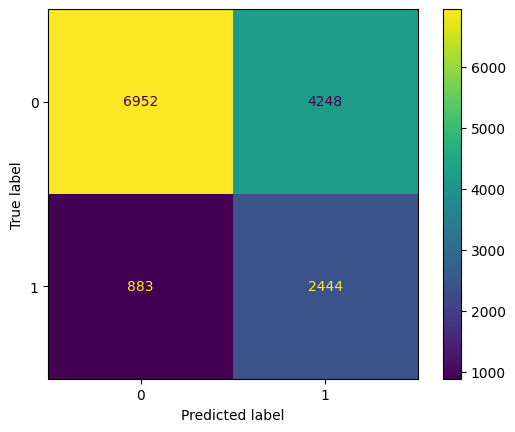

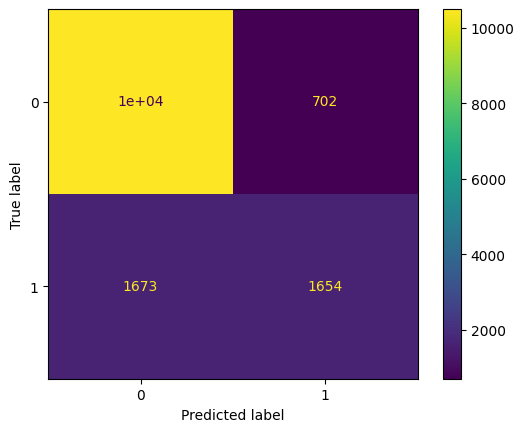

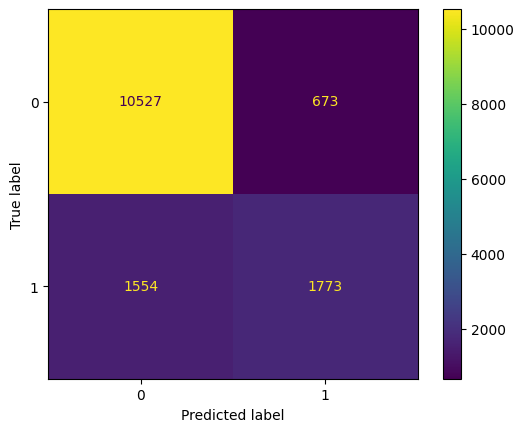

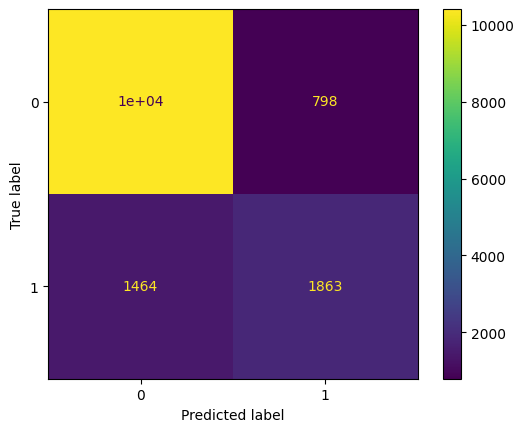

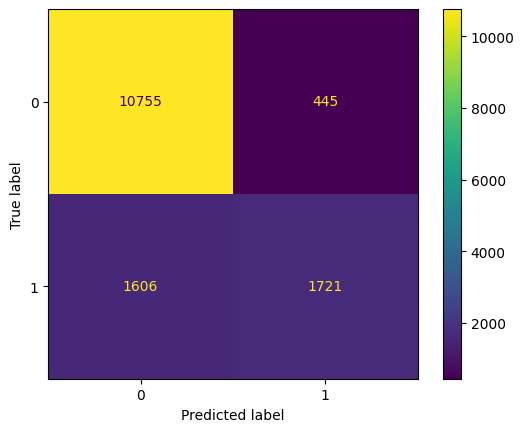

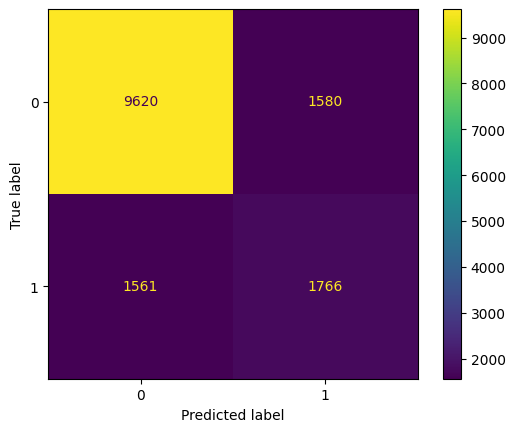

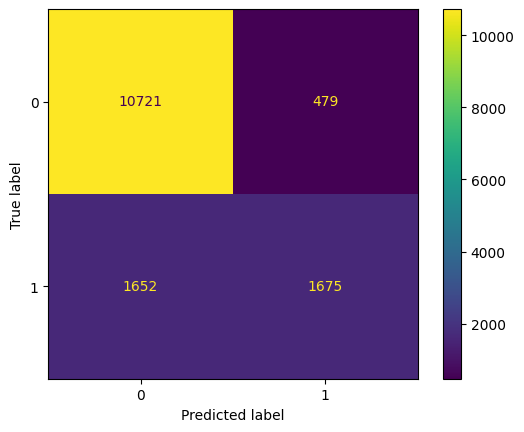

In [ ]:
for model, model_prediction in zip(model_list, model_predictions):
    print(model)
    cm = confusion_matrix(y_val, model_prediction)
    matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
    matrix.plot()

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το σύνολο εκπαίδευσης [test set](https://drive.google.com/file/d/1bcmuoeRVY0y5ZuY6nZcmzy8_5fOFR4Oa/view?usp=drive_link).


____
Για το test set, προσθέτουμε μια άδεια στήλη id καθώς το pipeline περιμένει να κάνει drop την στήλη id. Επίσης, μετατρέπουμε το format της στήλης Date από dd/mm/YYYY σε YYYY-mm-dd, καθώς έτσι τις περιμένει το preprocessing pipeline.
____

In [ ]:
test_data = pd.read_csv('./test.csv')
test_data['Date'] = pd.to_datetime(test_data['Date'], format="%d/%m/%Y").dt.strftime("%Y-%m-%d")
test_data['id'] = np.nan
X_test_transformed = preprocessor.transform(test_data)

In [ ]:
best_model = model_list[3] # mlp
y_pred_test = best_model.predict(X_test_transformed)

5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [ ]:
from pathlib import Path

def make_csv(predictions, path):
    results = pd.DataFrame({
        'id': list(range(1, len(predictions)+1)),
        'RainTomorrow': predictions.astype(int)
    })
    filepath = Path(path)
    filepath.parent.mkdir(parents=True, exist_ok=True)
    results.to_csv(filepath, index=False)

In [ ]:
make_csv(y_pred_test, 'submission-MLP-untuned.csv')

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

____
Σε όλα τα grid search, επιλέγουμε ως καλύτερο το ταξινομητή με το καλύτερο f1-score.
____

____
Ο naive bayes δεν έχει υπερπαραμέτρους. Εφαρμόζουμε το gridsearch απλά για την αναφορά του 5-fold.
____

In [ ]:
# just for the 5-fold
gnb_search_space = {}
estimator = GaussianNB()
gnb_grid = GridSearchCV(estimator, gnb_search_space, scoring='f1')
gnb_grid.fit(X_train, y_train)

GridSearchCV(estimator=GaussianNB(), param_grid={}, scoring='f1')

____
Για το kNN, αναζητούμε βέλτιστες υπερπαραμέτρους για $k \in \{1, 3, 5, 7, 9, 11\}$ και μέτρα τις $L_1$ και $L_2$ νόρμες. Παρουσιάζεται το grid μόνο για $k \in \{5, 7, 9, 11\}$.
____

In [ ]:
knn_search_space = {
    'n_neighbors': [5, 7, 9, 11], # 8, ~8min
    'metric':['euclidean', 'manhattan']
}
# l1 is significantly slower because no vectorization (l2 can be computed as inner product)
estimator = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator, knn_search_space, scoring='f1')
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11]},
             scoring='f1')

____
Για το Logistic Regression χρησιμοποιούμε τους liblinear και lbfgs solvers για να υποστηρίξουμε όλα τα penalty. Για τις τιμές regularization $C$, ψάχνουμε σε δυνάμεις του 10. Χαμηλές τιμές του $C$ εφαρμόζουν υψηλότερο επίπεδο regularization.

Δοκιμάστηκαν οι επιλογές class_weight που προσφέρει το sklearn και παρατηρήθηκε ότι η επιλογή 'balanced', που scalάρει το κόστος κάθε δείγματος ανάλογα τη κλάση του, έδινε καλύτερα f1-score. Αυτό δικαιολογείται από την ανισορροπία των κλάσεων. Σε όλους τους ταξινομητές που προσφέρουν την επιλογή αυτή, την επιλέγουμε.
____

In [ ]:
# 1min
lrc_search_space = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1, 10, 100, 1000, 10000],
        'class_weight': ['balanced'],
        'max_iter': [1000],
        'solver': ['liblinear'],
    },
    {
        'penalty': ['l2'],
        'C': [1, 10, 100, 1000, 10000],
        'class_weight': ['balanced'],
        'max_iter': [1000],
        'solver': ['lbfgs'],
    },
    {
        'penalty': [None],
        #'C': [1, 10, 100, 1000, 10000],
        'class_weight': ['balanced'],
        'max_iter': [1000],
        'solver': ['lbfgs'],
    },
]

estimator = LogisticRegression()
lrc_grid = GridSearchCV(estimator, lrc_search_space, scoring='f1')
lrc_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'class_weight': ['balanced'], 'max_iter': [1000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [1, 10, 100, 1000, 10000],
                          'class_weight': ['balanced'], 'max_iter': [1000],
                          'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'class_weight': ['balanced'], 'max_iter': [1000],
                          'penalty': [None], 'solver': ['lbfgs']}],
             scoring='f1')

_____
Για το νευρωνικό δίκτυο παρουσιάζονται όλες οι προσπάθειες grid search.

Αρχικά, αναζητήθηκε μεγάλο πλήθος συνδυασμών υπερπαραμέτρων, που έτρεξε τοπικά για 4 μέρες. Από αυτά τα runs, παρατηρήθηκε ότι το slice υπεραραμέτρων με $lr = 10^{-4}$ εδινε καλύτερα αποτελέσματα. Επίσης, οι αρχιτεκτονικές 2 κρυφών επιπέδων έδιναν χειρότερα f1-scores από ότι τις αρχ/κες 1 κρυφού επιπέδου.

Τελικά, παρουσιάζονται οι καλύτεροι συνδυασμοί για 64, 128 και 256 νευρώνες. Το grid search χρειάζεται 2h40min στο Colab. Παρατηρούμε ότι για πιο πολύπλοκα δίκτυα με περισσότερες παραμέτρους, χρειάζονται υψηλότερα επίπεδα regularization για να καταπολεμηθεί το overfitting και μεγαλύτερα batch sizes για καλύτερο approximation της συνάρτησης κόστους.
____

In [ ]:
# first try(4days) 3000fits
mlp_search_space = {
    'hidden_layer_sizes': [(64,), (128,), (256,), (512,), (124, 64), (256, 124)],
    'learning_rate_init': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,],
    'activation': ['relu'],
    'solver': ['adam'],
    'batch_size': [128, 256, 512, 1024],
    'max_iter': [1000],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,],
}

# second try(1day) 300fits
mlp_search_space = {
    'hidden_layer_sizes': [(64,), (128,), (256,), (512,),],
    'learning_rate_init': [1e-4,],
    'activation': ['relu'],
    'solver': ['adam'],
    'batch_size': [256, 512, 1024],
    'max_iter': [2000],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,],
}

# third try(2h40min) ~40fits
mlp_search_space = [
    # {
    #     'hidden_layer_sizes': [(64,),],
    #     'learning_rate_init': [1e-4,],
    #     'activation': ['relu'],
    #     'solver': ['adam'],
    #     'batch_size': [256, 512,],
    #     'max_iter': [1000],
    #     'alpha': [1e-5, 1e-4, 1e-3, 1e-2,],
    # },
    {
        'hidden_layer_sizes': [(128,),],
        'learning_rate_init': [1e-4,],
        'activation': ['relu'],
        'solver': ['adam'],
        'batch_size': [1024],
        'max_iter': [1000],
        'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,],
    },
    {
        'hidden_layer_sizes': [(256,),],
        'learning_rate_init': [1e-4,],
        'activation': ['relu'],
        'solver': ['adam'],
        'batch_size': [256, 512, 1024],
        'max_iter': [1000],
        'alpha': [1e-1,],
    },
]


estimator = MLPClassifier()
mlp_grid = GridSearchCV(estimator, mlp_search_space, scoring='f1')
mlp_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

GridSearchCV(estimator=MLPClassifier(),
             param_grid=[{'activation': ['relu'],
                          'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                          'batch_size': [1024], 'hidden_layer_sizes': [(128,)],
                          'learning_rate_init': [0.0001], 'max_iter': [1000],
                          'solver': ['adam']},
                         {'activation': ['relu'], 'alpha': [0.1],
                          'batch_size': [256, 512, 1024],
                          'hidden_layer_sizes': [(256,)],
                          'learning_rate_init': [0.0001], 'max_iter': [1000],
                          'solver': ['adam']}],
             scoring='f1')

_____
Για το SVM, δοκιμάστηκαν γραμμικά, γκαουσιαννά και πολυωνυμικά kernel. Τα rbf kernel, παρουσιάζουν καλύτερα αποτελέσματα.

Αναφορικά με την υπερπαράμετρο $C$, αυτή καθορίζει το ποσό regularization. Για χαμηλές τιμές εφαρμόζεται περισσότερο regularization, το υπερεπίπεδο απόφασης είναι πιο smooth και έτσι οι λάθος ταξινομήσεις ή γενικότερα τα θορυβώδη datapoints δεν λαμβάνονται σημαντικά υπόψη.

Η υπερπαράμετρος $γ$, αποτελεί πολλαπλασιαστική παράμετρος για τις νόρμες των διαφορών για τα διάφορα kernel. Υψηλές τιμές $γ$ scalάρουν την απόσταση ενός datapoint από τα υπόλοιπα.
_____

In [ ]:
svc_search_space = [
    #{
    #    'C': [0.01, 0.1, 1,],
    #    'kernel': ['linear'],
    #    'class_weight': ['balanced'],
    #},
    # that's the good stuff 30fits ~1h
    {
        'C': [0.1, 1, 10],
        'kernel': ['rbf',],
        'class_weight': ['balanced'],
        'gamma': [ 0.001, 0.01,],
    },
    #{
    #    'C': [0.1, 1, 10,],
    #    'kernel': ['poly'],
    #    'degree': [3, 5, 7],
    #    'class_weight': ['balanced'],
    #    'gamma': [ 0.001, 0.01,],
    #    'coef0': [0, 1],
    #},
]

estimator = SVC()
svc_grid = GridSearchCV(estimator, svc_search_space, scoring='f1')
svc_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                          'gamma': [0.001, 0.01], 'kernel': ['rbf']}],
             scoring='f1')

____
Για το δέντρο απόφασης, δοκιμάζουμε χώρο υπερπαραμέτρων μεγάλης διάστασης καθώς τα fit παίρνουν λιγότερο από 1sec.

Οι υπερπαράμετροι min_samples_split, min_samples_leaf βοηθούν στη καταπολέμηση του overfitting.

- min_samples_split: Το ελάχιστο πλήθος δεδομένων που χρειάζεται για να χωρίσουμε το κόμβο. Για πλήθος δεδομένων κάτω από αυτό, θεωρούμε το κόμβο να είναι φύλλο. Για πλήθος δεδομένων πάνω από αυτό, σπλιτάρουμε.
- min_samples_leaf: Το ελάχιστο πλήθος δειγμάτων που χρειάζεται για να είναι ο κόμβος φύλλο. Για πλήθος δεδομένων κάτω από αυτό, θεωρούμε το κόμβο να είναι φύλλο. Για πλήθος δεδομένων πάνω από αυτό, σπλιτάρουμε.

Κάποιοι συνδυασμοί τιμών $min\_samples\_split$, $min\_samples\_leaf$ συγκρούονται μεταξύ τους. Για παράδειγμα, για $min\_samples\_split = 100$ και $min\_samples\_leaf = 100$ συγκρούονται όταν έχουμε 100 δείγματα. Χωρίζουμε στα 100 δείγματα σύμφωνα με το 1ο αλλά τελικά δεν χωρίζουμε σύμφωνα με το 2ο. Σύμφωνα με το documentation, σε περιπτώσεις συγκρούσεων υπερτερεί το min_samples_leaf.

___

In [ ]:
# 1600fits, ~7min
dtc_search_space = [
    {
        'criterion': ['gini', 'entropy',],
        'splitter': ['best', 'random',],
        'max_depth': [None, 5, 10, 20, 30],
        'class_weight': ['balanced'],
        'min_samples_split': [2, 10, 100, 500],
        'min_samples_leaf':  [1, 20, 50, 100, ],
    },
]

estimator = tree.DecisionTreeClassifier()
dtc_grid = GridSearchCV(estimator, dtc_search_space, scoring='f1')
dtc_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'class_weight': ['balanced'],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 5, 10, 20, 30],
                          'min_samples_leaf': [1, 20, 50, 100],
                          'min_samples_split': [2, 10, 100, 500],
                          'splitter': ['best', 'random']}],
             scoring='f1')

___
Ο χώρος υπεραπραμέτρων παραμένει ο ίδιος. Χρησιμοποιούμε 100 estimators.
___

In [ ]:
# 30min
rfc_search_space = [
    {
        'n_estimators': [100],
        'criterion': ['gini', 'entropy',],
        'max_depth': [None, 5, 10, 20, 30],
        'class_weight': ['balanced'],
        'min_samples_split': [2, 10, 100, 500],
        'min_samples_leaf':  [1, 20, 50, 100, ],
    },
]

estimator = RandomForestClassifier()
rfc_grid = GridSearchCV(estimator, rfc_search_space, scoring='f1')
rfc_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'class_weight': ['balanced'],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 5, 10, 20, 30],
                          'min_samples_leaf': [1, 20, 50, 100],
                          'min_samples_split': [2, 10, 100, 500],
                          'n_estimators': [100]}],
             scoring='f1')

6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
all_fitted_grids = [
    gnb_grid,
    knn_grid,
    lrc_grid,
    mlp_grid,
    svc_grid,
    dtc_grid,
    rfc_grid
]

best_models = []
best_model_predictions = []
cv_results = []
for fitted_grid in all_fitted_grids:
    cv_results.append(fitted_grid.cv_results_)

    best_params = fitted_grid.best_params_
    print('\n\n', best_params)

    best_model= fitted_grid.best_estimator_
    print(best_model)
    best_models.append(best_model)

    preds = best_model.predict(X_val)
    best_model_predictions.append(preds)




 {}
GaussianNB()


 {'metric': 'euclidean', 'n_neighbors': 7}
KNeighborsClassifier(metric='euclidean', n_neighbors=7)


 {'C': 1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=1, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')


 {'activation': 'relu', 'alpha': 0.1, 'batch_size': 256, 'hidden_layer_sizes': (256,), 'learning_rate_init': 0.0001, 'max_iter': 1000, 'solver': 'adam'}
MLPClassifier(alpha=0.1, batch_size=256, hidden_layer_sizes=(256,),
              learning_rate_init=0.0001, max_iter=1000)


 {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, class_weight='balanced', gamma=0.01)


 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 500, 'splitter': 'best'}
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=50


6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [ ]:
for model, preds in zip(best_models, best_model_predictions):
    print(model, 'f1-score', f'{f1_score(y_val, preds,):.5f}')
    print(classification_report(y_val, preds))

GaussianNB() f1-score 0.48787
              precision    recall  f1-score   support

         0.0       0.89      0.62      0.73     11200
         1.0       0.37      0.73      0.49      3327

    accuracy                           0.65     14527
   macro avg       0.63      0.68      0.61     14527
weighted avg       0.77      0.65      0.67     14527

KNeighborsClassifier(metric='euclidean', n_neighbors=7) f1-score 0.58917
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     11200
         1.0       0.73      0.49      0.59      3327

    accuracy                           0.84     14527
   macro avg       0.80      0.72      0.75     14527
weighted avg       0.83      0.84      0.83     14527

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear') f1-score 0.63878
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86     11200


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


____
Από τα f1-score, καταλήγουμε ότι τα ρυθμισμένα MLP και SVM, παρουσιάζουν τις καλύτερες επιδόσεις. Από τα confusion matrices, παρατηρούμε ότι το SVM παρουσιάζει καλύτερη συμπεριφορά ως προς την αναλογία false positive, false negative κρατώντας και τα 2 σχετικά χαμηλά, σε σχέση με το MLP, το οποίο παρουσιάζει πολύ υψηλό αριθμό false positive, συγκρίσιμο με τα true positive. Αυτό ενδέχεται να αποτελεί ένδειξη overfitting. Συνεπώς, επιλέγουμε το SVM με υπερπαραμέτρους {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'} ως το καλύτερο ταξινομητή.

Disclaimer: Τα παραπάνω αφορούν διφορετικό run από αυτό που παρουσιάζεται εδώ με διφορετικό split training-validation set. Εν γένει, η απόδοση του SVC παρουσίαζε μικρότερες αυξομειώσεις ανεξαρτήτου validation set, για αυτό και επιλέχθηκε.
_____

GaussianNB()
KNeighborsClassifier(metric='euclidean', n_neighbors=7)
LogisticRegression(C=1, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')
MLPClassifier(alpha=0.1, batch_size=256, hidden_layer_sizes=(256,),
              learning_rate_init=0.0001, max_iter=1000)
SVC(C=10, class_weight='balanced', gamma=0.01)
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=500)
RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=10)


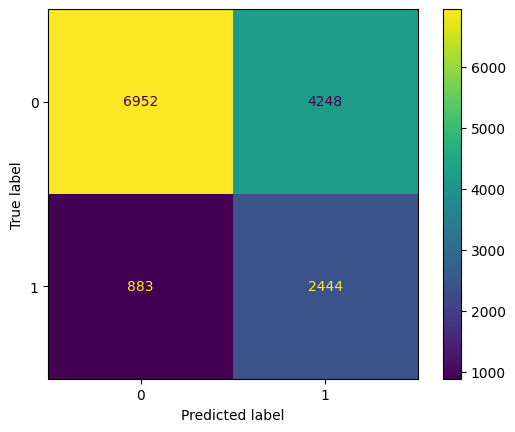

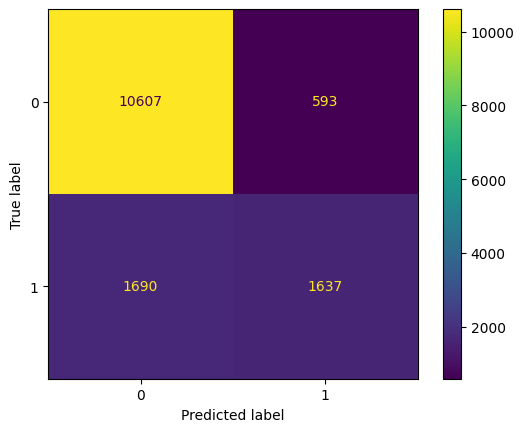

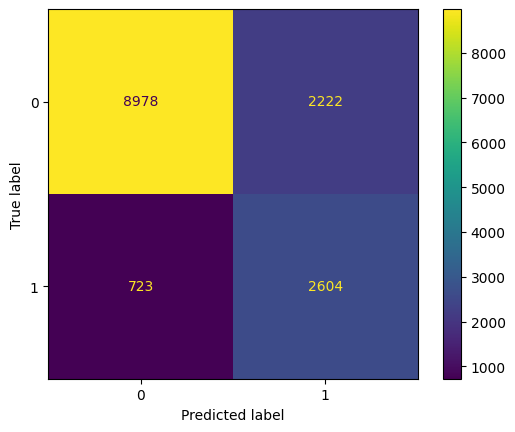

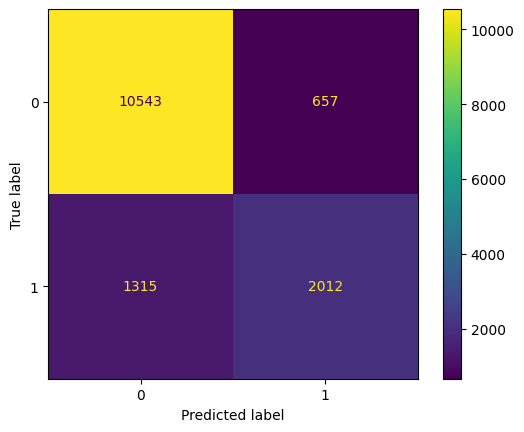

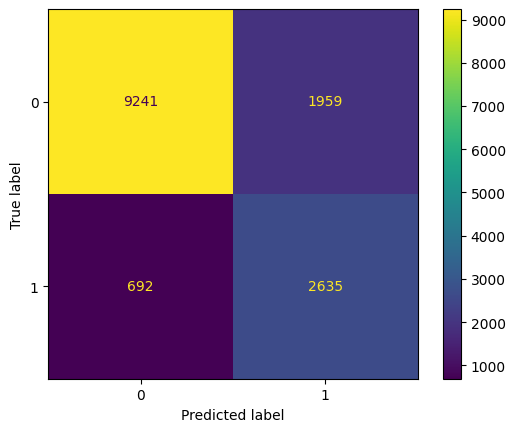

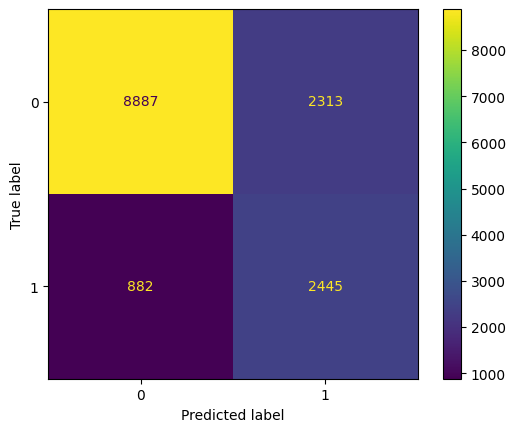

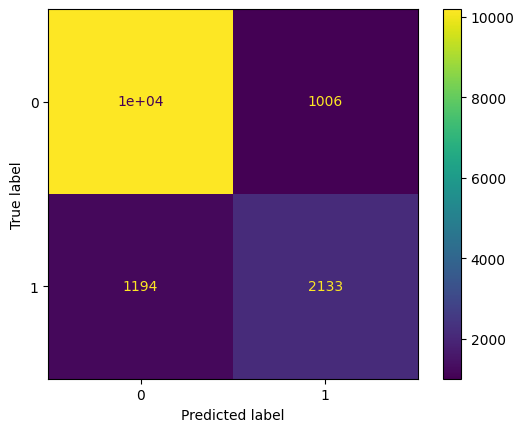

In [ ]:
for model, preds in zip(best_models, best_model_predictions):
    print(model)
    cm = confusion_matrix(y_val, preds)
    matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
    matrix.plot()

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [ ]:
"""test_data = pd.read_csv('./test.csv')
test_data['Date'] = pd.to_datetime(test_data['Date'], format="%d/%m/%Y").dt.strftime("%Y-%m-%d")
test_data['id'] = np.nan
X_test_transformed = preprocessor.transform(test_data)"""

'test_data = pd.read_csv(\'./test.csv\')\ntest_data[\'Date\'] = pd.to_datetime(test_data[\'Date\'], format="%d/%m/%Y").dt.strftime("%Y-%m-%d")\ntest_data[\'id\'] = np.nan\nX_test_transformed = preprocessor.transform(test_data)'

In [ ]:
#best_model = best_models[3] # mlp
best_model = best_models[4] # svc
#best_model = best_models[6] # rfc
y_pred_test = best_model.predict(X_test_transformed)

7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [ ]:
make_csv(y_pred_test, 'submission-svc.csv')